In [ ]:
import sys
sys.path.append('..')

In [168]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as p9

In [ ]:
%load_ext autoreload
%autoreload 2
from src.all_features import AllFS
from src.feature_selector import FeatureSelector, discretize, conditional_mutual_information
from src.data_generators import DataSetGenerator, draw_function
from src.experiment import Experiment
from src.jmi import JMI
from src.minimax import MiniMax
from src.mifs import MIFS
from src.lasso import LassoFS
from src.rffs import RandomForestFS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

In [ ]:
def generate_fs_list(df, stopping_features=100):
    allfs = AllFS(df)
    jmi = JMI(df, unique_th=10, stopping_n_features=10, stopping_criterium=0.01)
    mm = MiniMax(df, unique_th=10, stopping_n_features=min(10, stopping_features))
    mifs = MIFS(df, unique_th=10, stopping_n_features=min(20, stopping_features))
    rffs = RandomForestFS(df)
    lasso = LassoFS(df, unique_th=10)
    return [allfs, jmi, mm, mifs, lasso, rffs]

# Communities and Crime

In [ ]:
# fetch dataset 
communities_and_crime = fetch_ucirepo(id=183) 

# data (as pandas dataframes) 
X = communities_and_crime.data.features.replace('?',np.NaN) 
y = communities_and_crime.data.targets.replace('?',np.NaN)

In [ ]:
df = pd.concat([y, X], axis=1)._get_numeric_data()
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)
df = pd.DataFrame(imp.transform(df), columns=df.columns)

In [ ]:
features_sets = generate_fs_list(df)

In [ ]:
communities_and_crime_experiment = Experiment(features_sets, OLS, df, "ViolentCrimesPerPop")
communities_and_crime_experiment.fit_fs()

In [ ]:
communities_and_crime_experiment.print_results()

R-squared adjusted for AllFS = 0.6793037773347834                   and bic = -1748.3323553967452 with 101 features.
R-squared adjusted for JMI = 0.6211392584457981                   and bic = -2053.284683915689 with 4 features.
R-squared adjusted for MiniMax = 0.6104062912104337                   and bic = -1990.9857207493922 with 5 features.
R-squared adjusted for MIFS = 0.6091666548819471                   and bic = -1885.7849954247454 with 20 features.
R-squared adjusted for LassoFS = 0.6793037773347834                   and bic = -1748.3323553967452 with 101 features.
R-squared adjusted for RandomForestFS = 0.6267961218002194                   and bic = -2010.7634828863227 with 15 features.


In [105]:
def plot_BIC(results):
    return (p9.ggplot(results, p9.aes(x="Method", y="bic")) +
        p9.geom_bar(stat='identity', fill="#4287f5") +
        p9.xlab("Method") +
        p9.ylab("BIC") +
        p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1)))

def plot_len(results):
    return (p9.ggplot(results, p9.aes(x="Method", y="len")) +
        p9.geom_bar(stat='identity', fill="#4287f5") +
        p9.xlab("Method") +
        p9.ylab("Number of features") +
        p9.theme(axis_text_x=p9.element_text(rotation=45, hjust=1)))

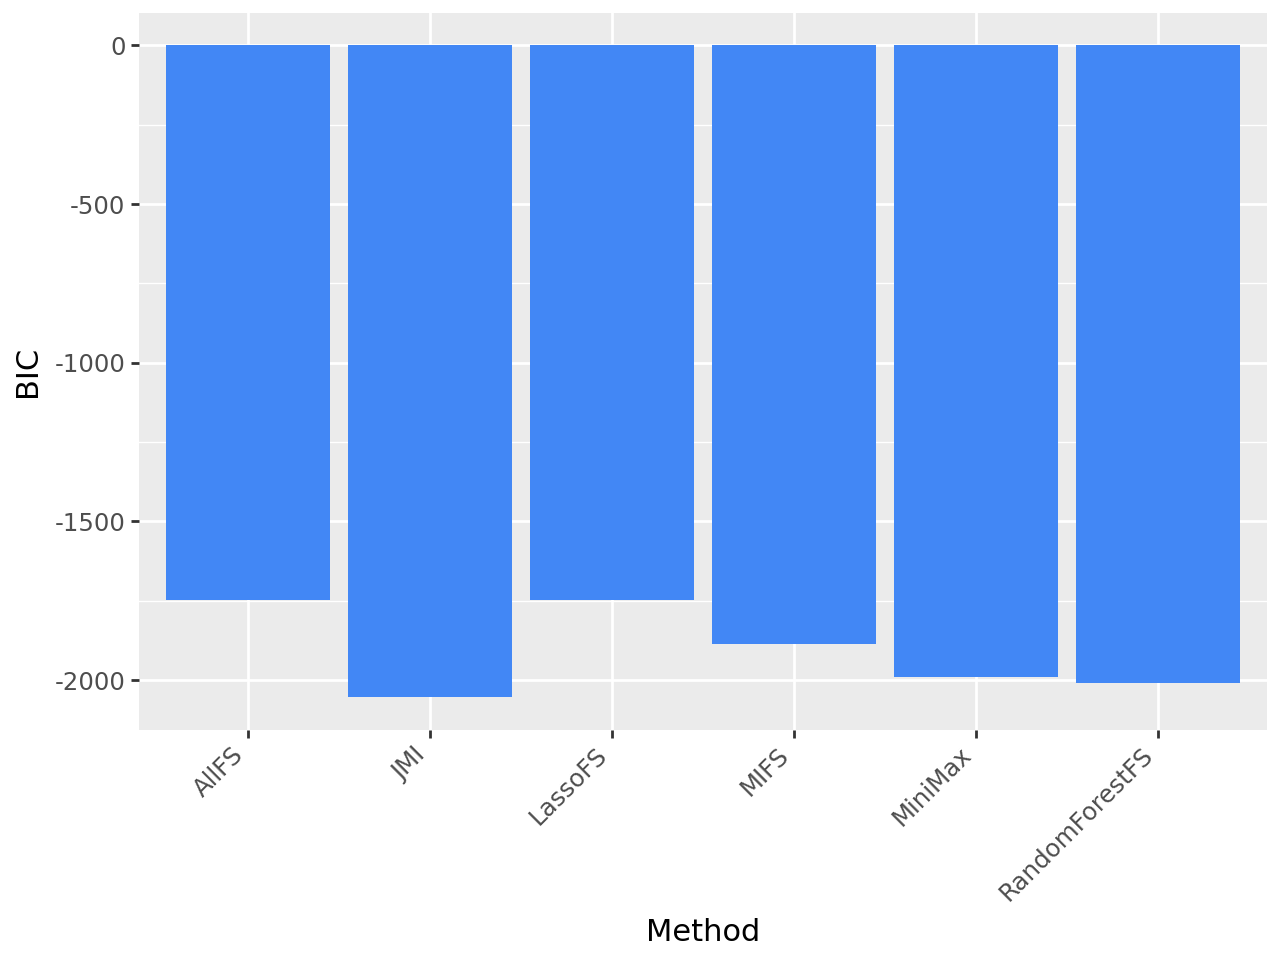

In [106]:
plot_BIC(communities_and_crime_experiment.results_pd)

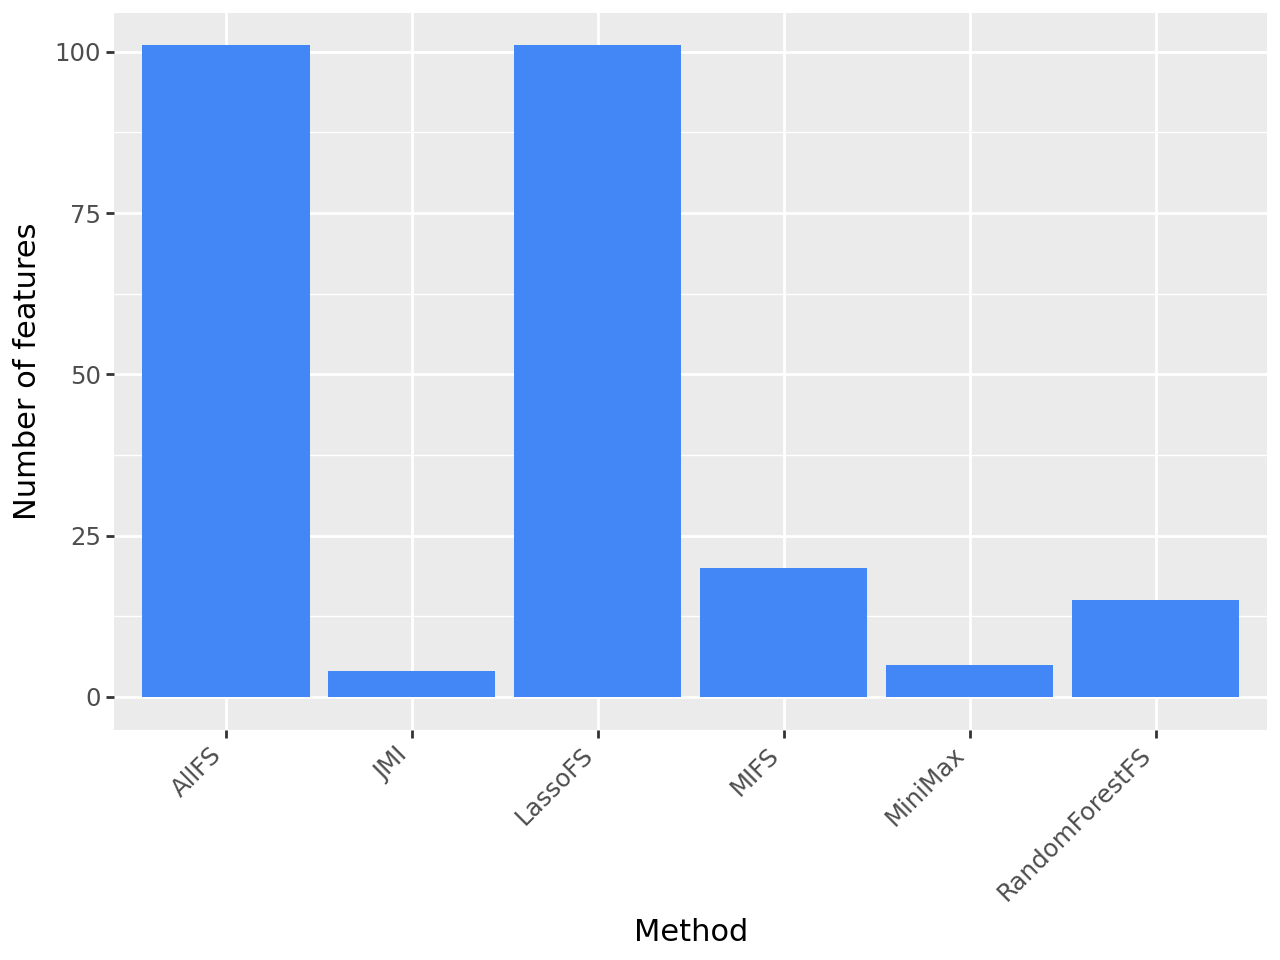

In [ ]:
plot_len(communities_and_crime_experiment.results_pd)

# AIDS

In [236]:
# fetch dataset 
aids = fetch_ucirepo(id=890) 
  
# data (as pandas dataframes) 
X = aids.data.features 
y = aids.data.targets 

In [237]:
df = pd.concat([y, X], axis=1)._get_numeric_data()

In [238]:
features_sets = generate_fs_list(df, stopping_features=20)

In [239]:
aids_experiment = Experiment(features_sets, OLS, df, "cid")
aids_experiment.fit_fs()
aids_experiment.print_results()

R-squared adjusted for AllFS = 0.4257323415476407                   and bic = 1419.9439678993137 with 23 features.
R-squared adjusted for JMI = 0.35375181923908716                   and bic = 1539.2948105579005 with 3 features.
R-squared adjusted for MiniMax = 0.4021542998117852                   and bic = 1386.1041402916671 with 4 features.
R-squared adjusted for MIFS = 0.42631721084812657                   and bic = 1397.790549218637 with 20 features.
R-squared adjusted for LassoFS = 0.4257323415476407                   and bic = 1419.9439678993137 with 23 features.
R-squared adjusted for RandomForestFS = 0.05199547838374807                   and bic = 2365.574004450712 with 3 features.


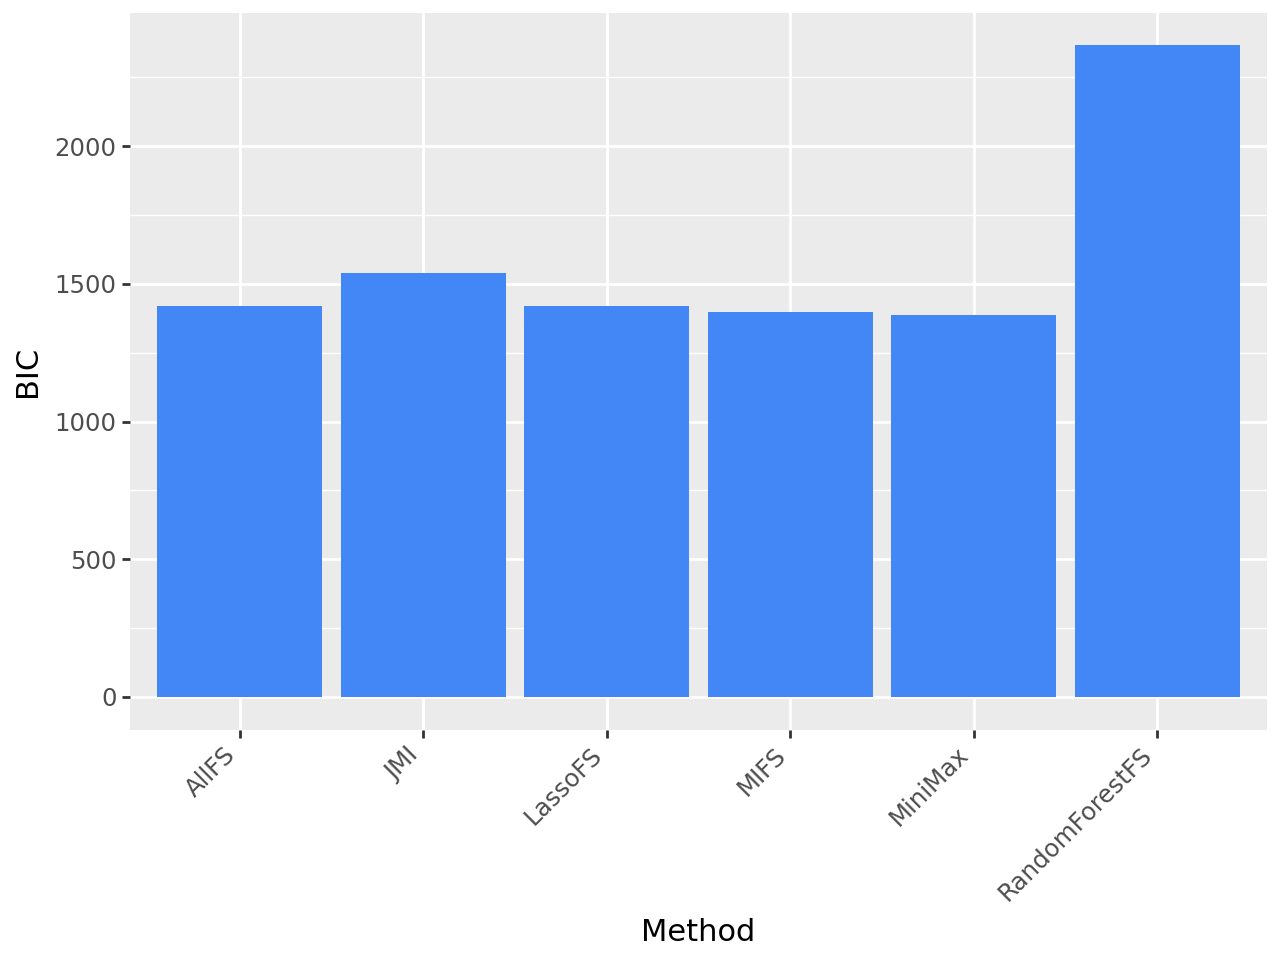

In [240]:
plot_BIC(aids_experiment.results_pd)

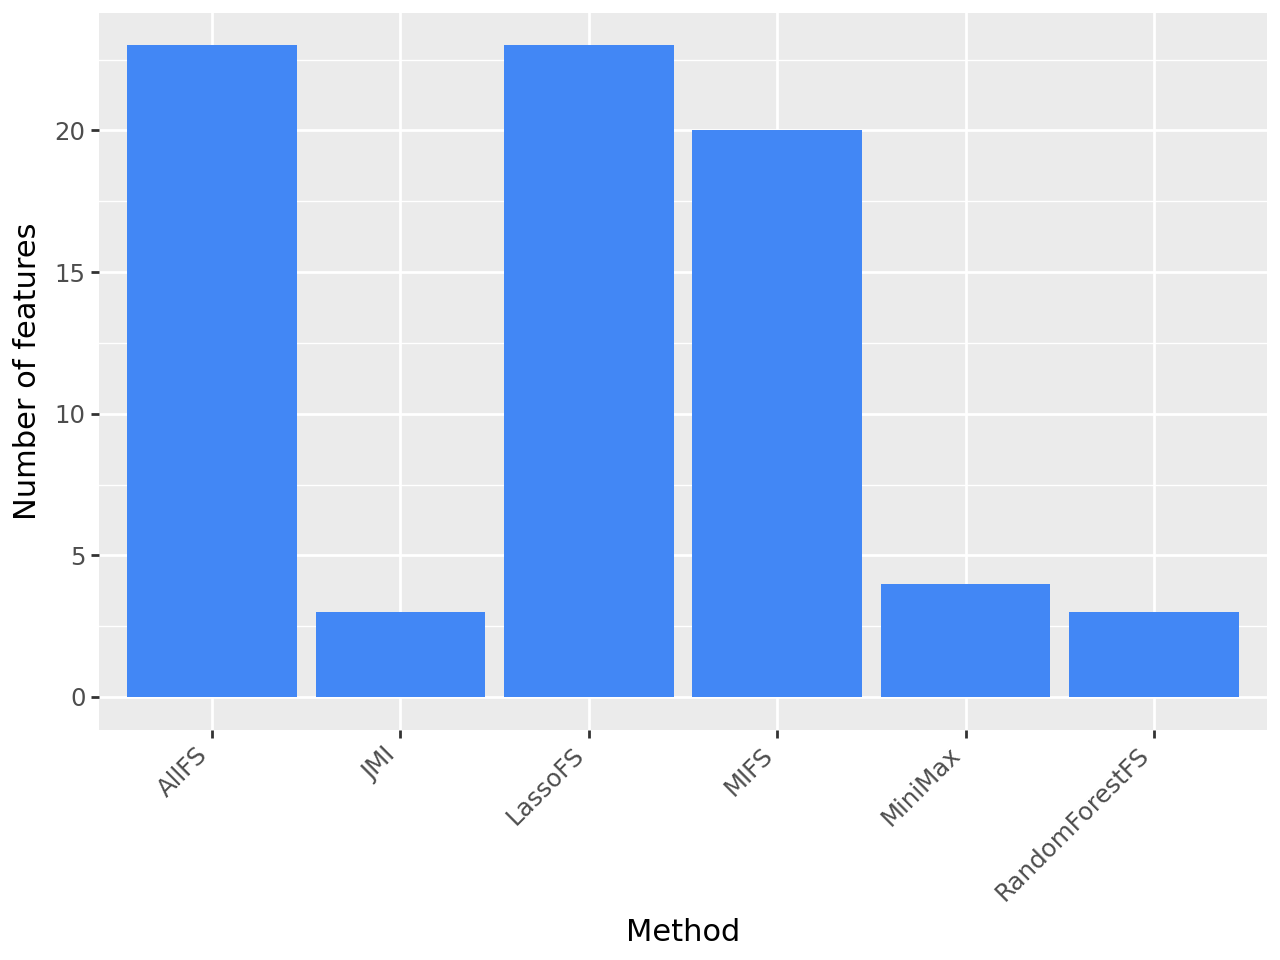

In [241]:
plot_len(aids_experiment.results_pd)

# infrared

In [250]:
infrared = fetch_ucirepo(id=925) 
  
# data (as pandas dataframes) 
X = infrared.data.features 
y = infrared.data.targets 

In [251]:
df = pd.concat([y["aveOralF"], X], axis=1)._get_numeric_data()
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)
df = pd.DataFrame(imp.transform(df), columns=df.columns)

In [252]:
features_sets = generate_fs_list(df)

In [253]:
infrared_experiment = Experiment(features_sets, OLS, df, "aveOralF")
infrared_experiment.fit_fs()
infrared_experiment.print_results()

R-squared adjusted for AllFS = 0.6036295663057674                   and bic = 194.21178235703377 with 30 features.
R-squared adjusted for JMI = 0.5522476887115926                   and bic = 158.96951144746347 with 3 features.
R-squared adjusted for MiniMax = 0.5693107064103976                   and bic = 125.26230322610044 with 4 features.
R-squared adjusted for MIFS = 0.6036360162446843                   and bic = 135.1812611728994 with 20 features.
R-squared adjusted for LassoFS = 0.6036295663057674                   and bic = 194.21178235703377 with 30 features.
R-squared adjusted for RandomForestFS = 0.562146471454426                   and bic = 171.69050685374026 with 9 features.


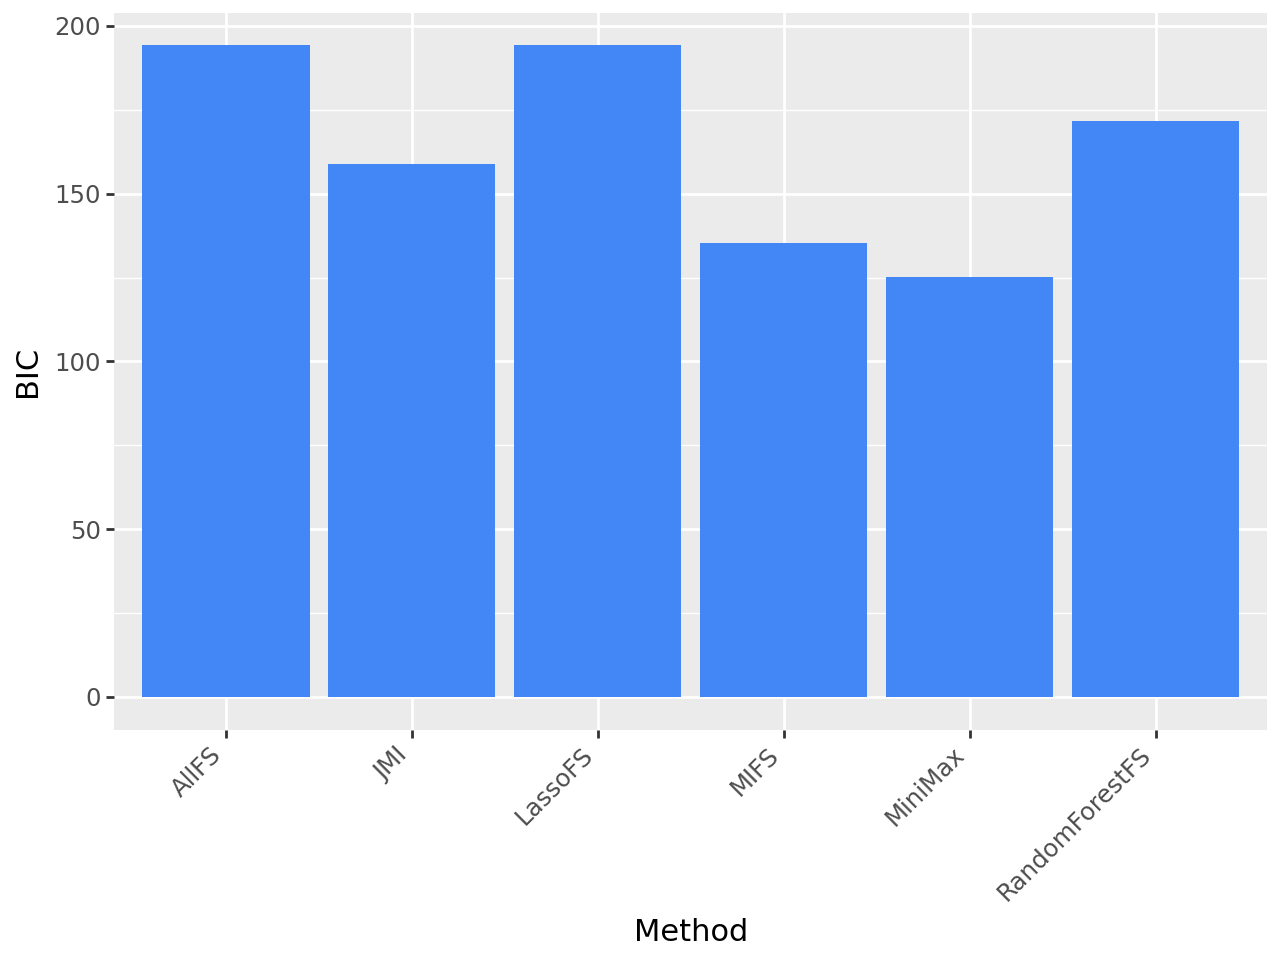

In [254]:
plot_BIC(infrared_experiment.results_pd)

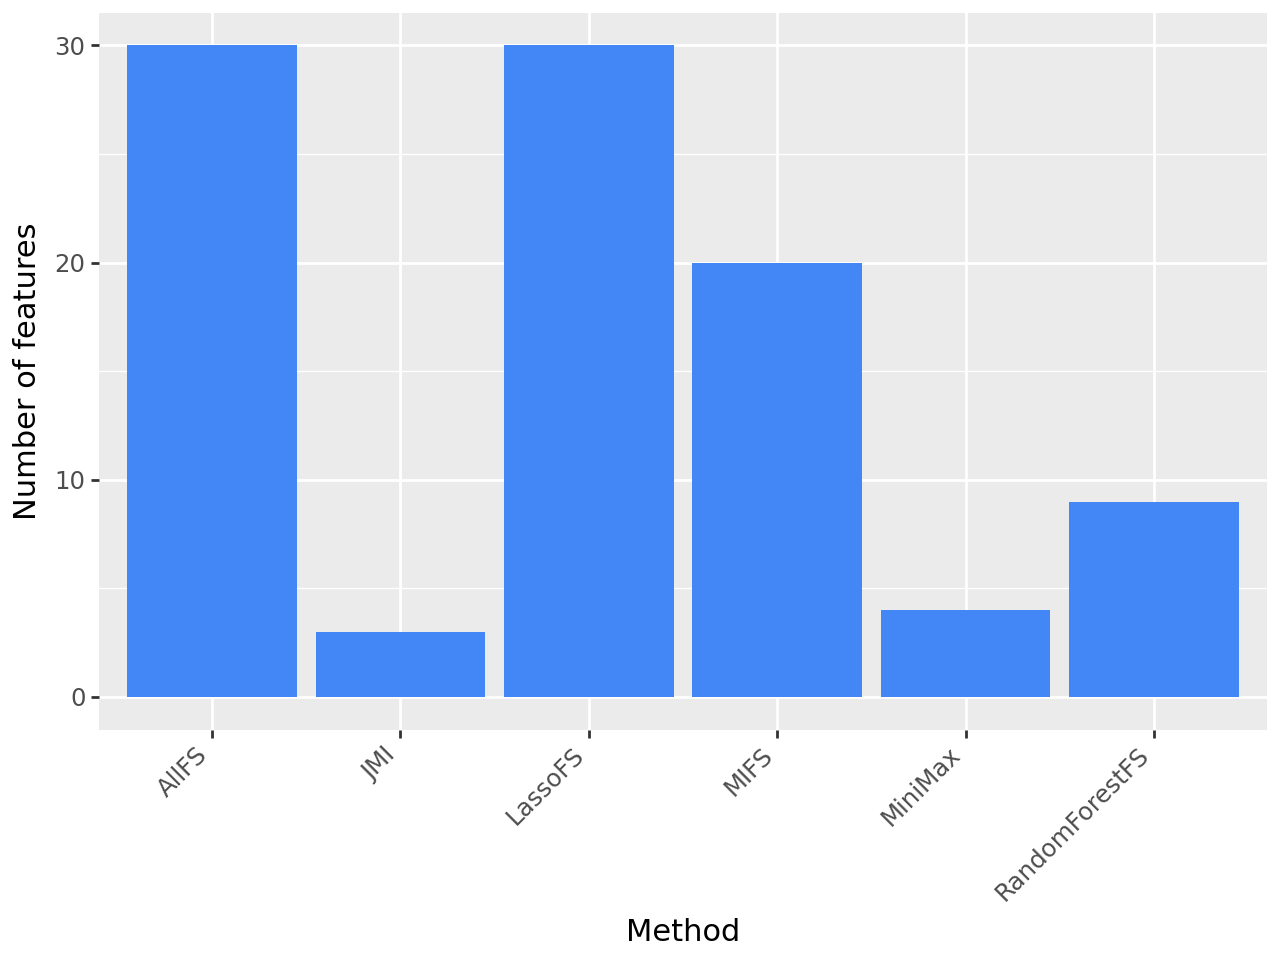

In [255]:
plot_len(infrared_experiment.results_pd)

# Productivity

In [196]:
productivity = fetch_ucirepo(id=597) 
  
# data (as pandas dataframes) 
X = productivity.data.features 
y = productivity.data.targets 

In [197]:
df = pd.concat([y, X], axis=1)._get_numeric_data()
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)
df = pd.DataFrame(imp.transform(df), columns=df.columns)

In [198]:
features_sets = generate_fs_list(df, stopping_features=10)

In [199]:
productivity_experiment = Experiment(features_sets, OLS, df, "actual_productivity")
productivity_experiment.fit_fs()
productivity_experiment.print_results()

R-squared adjusted for AllFS = 0.2735745014369706                   and bic = -1098.4173234064185 with 10 features.
R-squared adjusted for JMI = 0.06964442397438875                   and bic = -838.7275672516806 with 4 features.
R-squared adjusted for MiniMax = 0.03992622597488549                   and bic = -813.2584063601569 with 2 features.
R-squared adjusted for MIFS = 0.27357450143697026                   and bic = -1098.4173234064185 with 10 features.
R-squared adjusted for LassoFS = 0.12526721679035235                   and bic = -882.1143713174586 with 9 features.
R-squared adjusted for RandomForestFS = 0.17919921803384808                   and bic = -994.7792189753884 with 3 features.


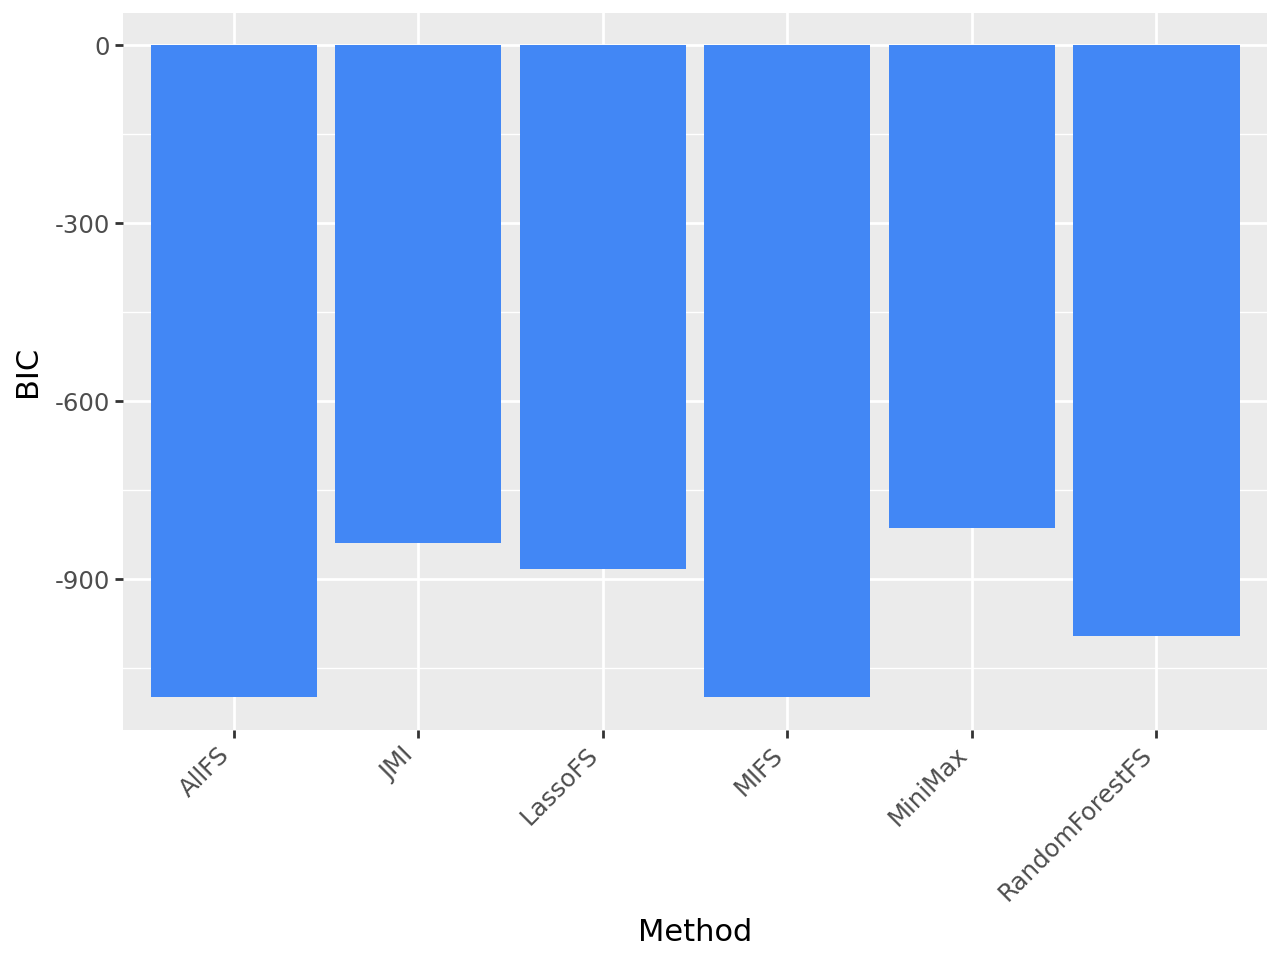

In [200]:
plot_BIC(productivity_experiment.results_pd)

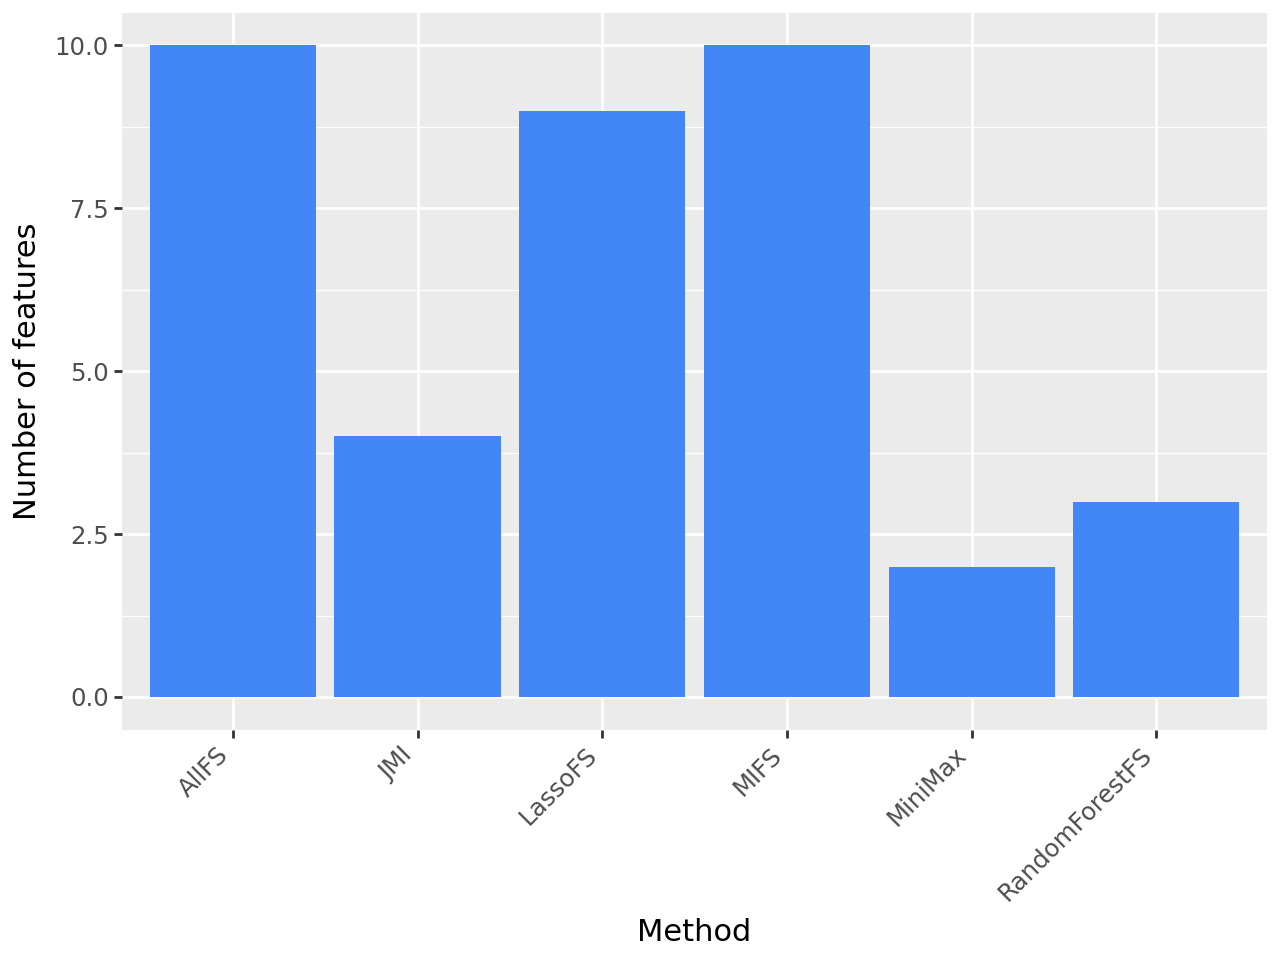

In [201]:
plot_len(productivity_experiment.results_pd)

# AI41

In [258]:
ai41 = fetch_ucirepo(id=601) 
  
# data (as pandas dataframes) 
X = ai41.data.features 
y = ai41.data.targets 

In [259]:
df = pd.concat([y, X], axis=1)._get_numeric_data()
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df)
df = pd.DataFrame(imp.transform(df), columns=df.columns)

In [260]:
features_sets = generate_fs_list(df, stopping_features=9)

In [261]:
ai41_experiment = Experiment(features_sets, OLS, df, "Machine failure")
ai41_experiment.fit_fs()
ai41_experiment.print_results()

R-squared adjusted for AllFS = 0.9153838676651989                   and bic = -30414.506956918278 with 10 features.
R-squared adjusted for JMI = 0.9151278618797504                   and bic = -30417.135429304508 with 6 features.
R-squared adjusted for MiniMax = 0.9154053144788599                   and bic = -30441.670047601172 with 7 features.
R-squared adjusted for MIFS = 0.9153902196297193                   and bic = -30423.466954445736 with 9 features.
R-squared adjusted for LassoFS = 0.9153838676651989                   and bic = -30414.506956918278 with 10 features.
R-squared adjusted for RandomForestFS = 0.7955461540966542                   and bic = -21641.590998762462 with 4 features.


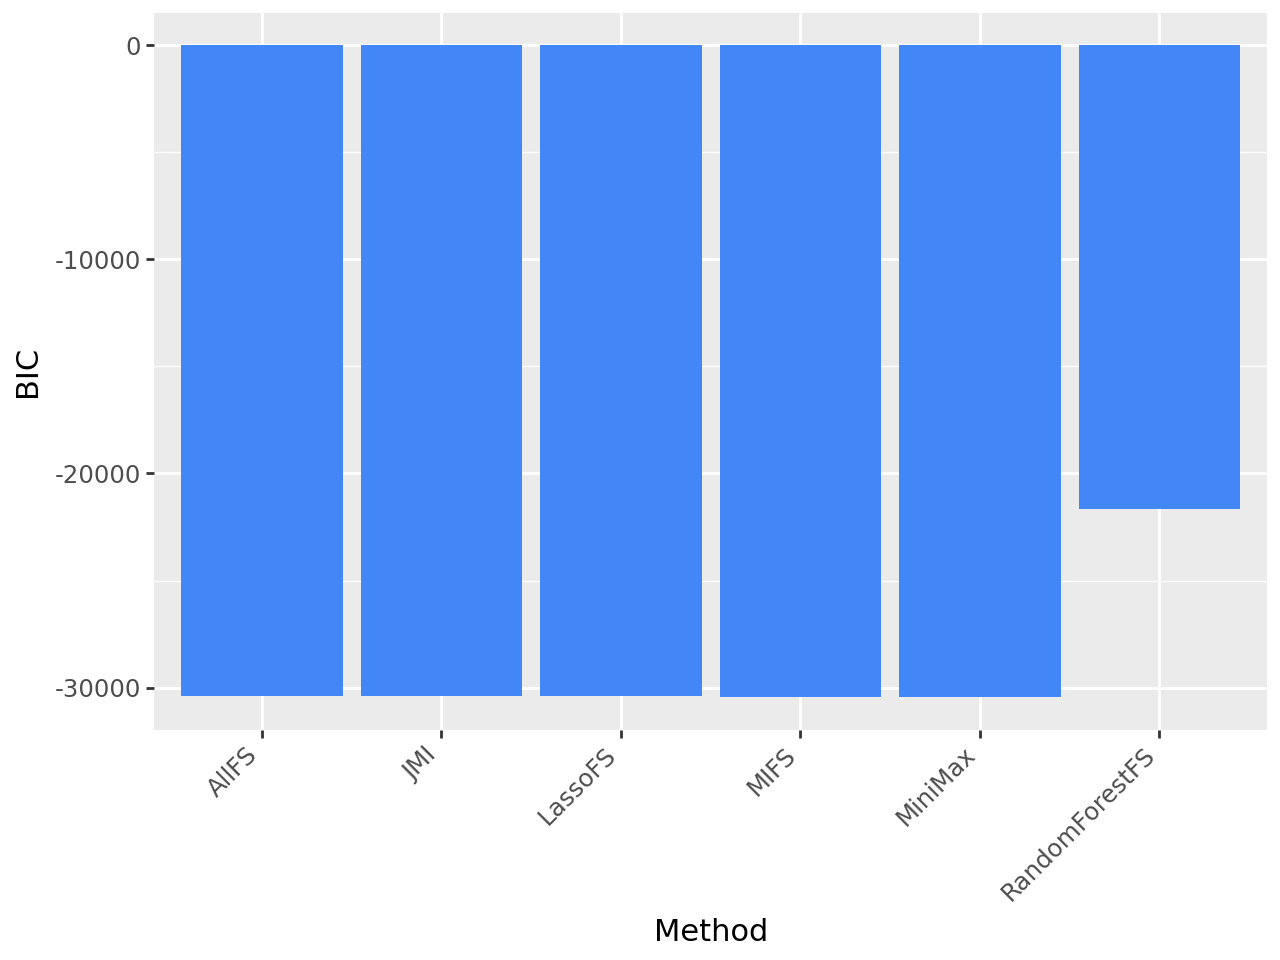

In [264]:
plot_BIC(ai41_experiment.results_pd)

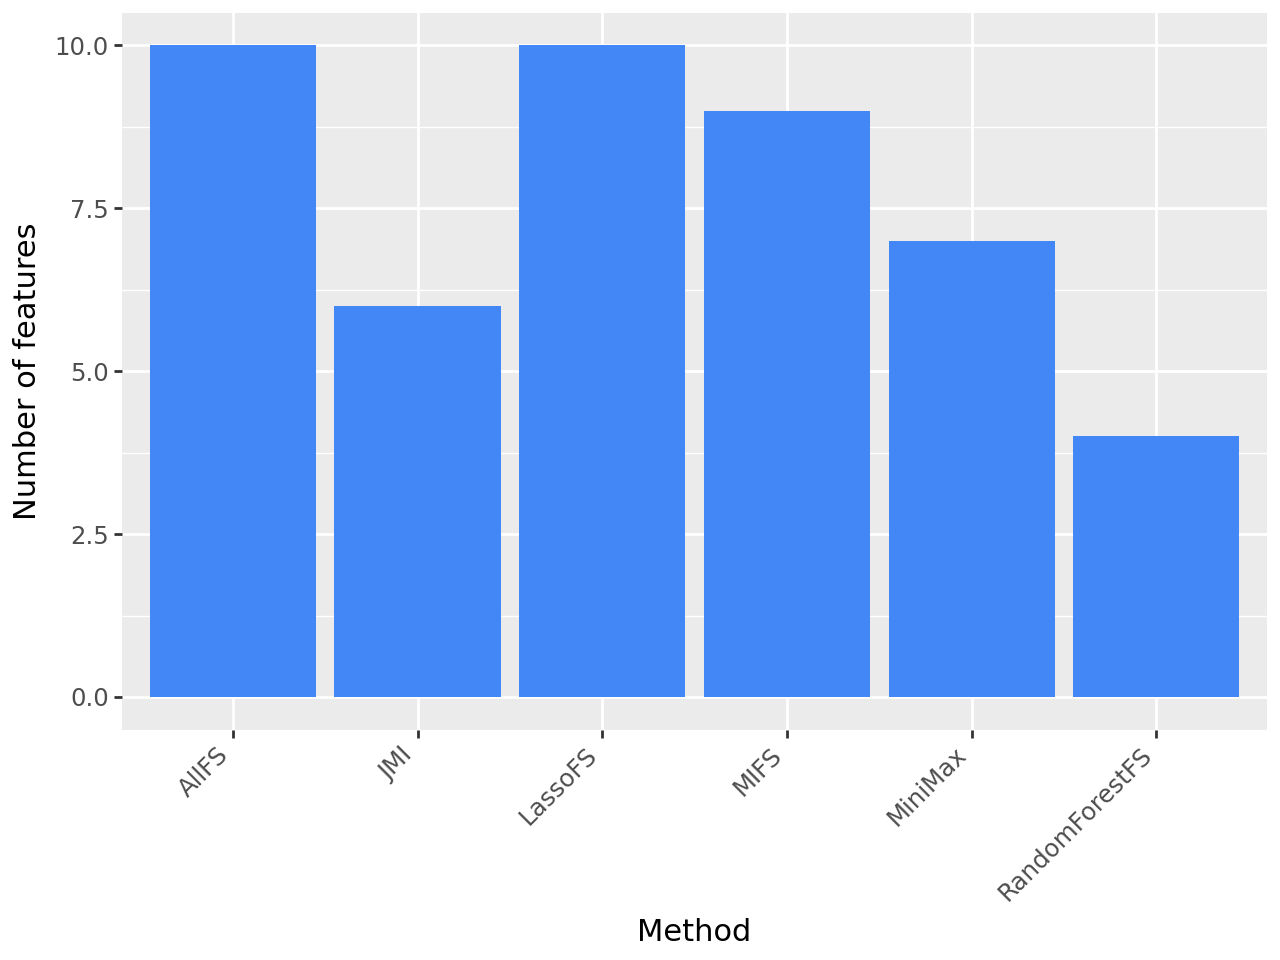

In [265]:
plot_len(ai41_experiment.results_pd)

## Summary

In [286]:
results = communities_and_crime_experiment

In [291]:
result_list = [
    communities_and_crime_experiment.results_pd,
    productivity_experiment.results_pd,
    infrared_experiment.results_pd,
    ai41_experiment.results_pd,
    aids_experiment.results_pd
]

In [293]:
all_results = pd.DataFrame()
for results in result_list:
    results["bic_rank"] = results["bic"].rank(method="min")
    results["feature_rank"] = results["len"].rank(method="min")
    all_results = pd.concat([all_results, results])

In [296]:
all_results.groupby("Method").agg("mean").sort_values("bic_rank")

,rsquared_adj,bic,len,bic_rank,feature_rank
Method,,,,,
MIFS,0.565617,-6374.939493,15.8,2.2,4.2
MiniMax,0.507441,-6346.909546,4.4,2.4,2.2
JMI,0.502382,-6322.176672,4.0,3.4,1.6
AllFS,0.579525,-6329.420177,34.8,3.6,5.0
LassoFS,0.549863,-6286.159587,34.6,4.2,4.8
RandomForestFS,0.443137,-4421.973838,6.8,4.2,2.0
